In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, confusion_matrix

from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
df = pd.read_csv("donnees_abbeville.csv", sep=",")
df

C:\Users\Admin.local\AppData\Local\Temp\ipykernel_3556\2417932611.py:1: DtypeWarning: Columns (112,150,231,232,234) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("donnees_abbeville.csv", sep=",")


,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,N°_DPE_remplacé,Date_fin_validité_DPE,Version_DPE,N°_DPE_immeuble_associé,Appartement_non_visité_(0/1),...,Nom Commune,Segment de client,Nombre de logements,Consommation annuelle totale de l'adresse (MWh),Consommation annuelle moyenne par logement de l'adresse (MWh),Consommation annuelle moyenne de la commune (MWh),Code EPCI,Code Département,Code Région,Tri des adresses
0,2380E4528528I,2024-01-03,2023-12-21,2023-11-27,DPE 3CL 2021 méthode logement,NaN,2033-12-20,2.3,2380E4528515V,0.0,...,Abbeville,RESIDENTIEL,51,289.837,5.683,3.428,200070993.0,80.0,32.0,17
1,2380E4528528I,2024-01-03,2023-12-21,2023-11-27,DPE 3CL 2021 méthode logement,NaN,2033-12-20,2.3,2380E4528515V,0.0,...,Abbeville,RESIDENTIEL,52,282.623,5.435,3.185,200070993.0,80.0,32.0,20
2,2380E4528528I,2024-01-03,2023-12-21,2023-11-27,DPE 3CL 2021 méthode logement,NaN,2033-12-20,2.3,2380E4528515V,0.0,...,Abbeville,RESIDENTIEL,52,290.334,5.583,3.243,200070993.0,80.0,32.0,20
3,2380E4528528I,2024-01-03,2023-12-21,2023-11-27,DPE 3CL 2021 méthode logement,NaN,2033-12-20,2.3,2380E4528515V,0.0,...,Abbeville,RESIDENTIEL,52,324.325,6.237,3.546,200070993.0,80.0,32.0,18
4,2380E4528528I,2024-01-03,2023-12-21,2023-11-27,DPE 3CL 2021 méthode logement,NaN,2033-12-20,2.3,2380E4528515V,0.0,...,ABBEVILLE,RESIDENTIEL,51,310.482,6.088,3.522,200070993.0,80.0,32.0,399866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717,2280E0778555O,2022-04-13,2022-04-11,2022-04-11,DPE 3CL 2021 méthode logement,NaN,2032-04-10,2.0,NaN,0.0,...,Abbeville,RESIDENTIEL,60,262.735,4.379,3.546,200070993.0,80.0,32.0,106
2718,2280E0778555O,2022-04-13,2022-04-11,2022-04-11,DPE 3CL 2021 méthode logement,NaN,2032-04-10,2.0,NaN,0.0,...,Abbeville,RESIDENTIEL,60,244.769,4.079,3.428,200070993.0,80.0,32.0,107
2719,2280E0778555O,2022-04-13,2022-04-11,2022-04-11,DPE 3CL 2021 méthode logement,NaN,2032-04-10,2.0,NaN,0.0,...,Abbeville,RESIDENTIEL,60,244.152,4.069,3.440,200070993.0,80.0,32.0,109
2720,2280E0778555O,2022-04-13,2022-04-11,2022-04-11,DPE 3CL 2021 méthode logement,NaN,2032-04-10,2.0,NaN,0.0,...,Abbeville,RESIDENTIEL,59,230.698,3.910,3.243,200070993.0,80.0,32.0,108


In [4]:
df.columns

Index(['N°DPE', 'Date_réception_DPE', 'Date_établissement_DPE',
       'Date_visite_diagnostiqueur', 'Modèle_DPE', 'N°_DPE_remplacé',
       'Date_fin_validité_DPE', 'Version_DPE', 'N°_DPE_immeuble_associé',
       'Appartement_non_visité_(0/1)',
       ...
       'Nom Commune', 'Segment de client', 'Nombre de logements',
       'Consommation annuelle totale de l'adresse (MWh)',
       'Consommation annuelle moyenne par logement de l'adresse (MWh)',
       'Consommation annuelle moyenne de la commune (MWh)', 'Code EPCI',
       'Code Département', 'Code Région', 'Tri des adresses'],
      dtype='object', length=261)

In [5]:
# Sélection des variables explicatives
features = ["Année_construction", "Surface_habitable_logement",
            "Type_énergie_principale_chauffage", "Type_énergie_principale_ECS", "Conso_5_usages_é_finale", "Classe_DPE"]

df_filtered = df.dropna(subset=features)
df_filtered = df_filtered[features]
df_filtered

,Année_construction,Surface_habitable_logement,Type_énergie_principale_chauffage,Type_énergie_principale_ECS,Conso_5_usages_é_finale,Classe_DPE
0,1996.0,65.1,Électricité,Électricité,7961.6,E
1,1996.0,65.1,Électricité,Électricité,7961.6,E
2,1996.0,65.1,Électricité,Électricité,7961.6,E
3,1996.0,65.1,Électricité,Électricité,7961.6,E
4,1996.0,65.1,Électricité,Électricité,7961.6,E
...,...,...,...,...,...,...
2717,2008.0,65.7,Électricité,Électricité,6727.0,D
2718,2008.0,65.7,Électricité,Électricité,6727.0,D
2719,2008.0,65.7,Électricité,Électricité,6727.0,D
2720,2008.0,65.7,Électricité,Électricité,6727.0,D


In [6]:
# Encodage des variables catégoriques
encoder = LabelEncoder()
df_filtered["Type_énergie_principale_chauffage"] = encoder.fit_transform(df_filtered["Type_énergie_principale_chauffage"])
df_filtered["Type_énergie_principale_ECS"] = encoder.fit_transform(df_filtered["Type_énergie_principale_ECS"])
df_filtered["Classe_DPE_encoded"] = encoder.fit_transform(df_filtered["Classe_DPE"])  # Transformer A, B, C... en nombres

In [7]:
# Définition des variables
X = df_filtered.drop(["Conso_5_usages_é_finale", "Classe_DPE"], axis=1)
y = df_filtered["Conso_5_usages_é_finale"]

In [8]:
X

,Année_construction,Surface_habitable_logement,Type_énergie_principale_chauffage,Type_énergie_principale_ECS,Classe_DPE_encoded
0,1996.0,65.1,3,1,2
1,1996.0,65.1,3,1,2
2,1996.0,65.1,3,1,2
3,1996.0,65.1,3,1,2
4,1996.0,65.1,3,1,2
...,...,...,...,...,...
2717,2008.0,65.7,3,1,1
2718,2008.0,65.7,3,1,1
2719,2008.0,65.7,3,1,1
2720,2008.0,65.7,3,1,1


In [9]:
y

0       7961.6
1       7961.6
2       7961.6
3       7961.6
4       7961.6
         ...  
2717    6727.0
2718    6727.0
2719    6727.0
2720    6727.0
2721    6727.0
Name: Conso_5_usages_é_finale, Length: 2071, dtype: float64

In [10]:
# Séparation train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de régression linéaire
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Prédictions et évaluation
y_pred = reg_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.2f} kWh")
print(f"R² Score : {r2:.2f}")

MAE : 912.50 kWh
R² Score : 0.85


In [12]:
for col in df.columns:
    print(col)

N°DPE
Date_réception_DPE
Date_établissement_DPE
Date_visite_diagnostiqueur
Modèle_DPE
N°_DPE_remplacé
Date_fin_validité_DPE
Version_DPE
N°_DPE_immeuble_associé
Appartement_non_visité_(0/1)
Méthode_application_DPE
N°_immatriculation_copropriété
Invariant_fiscal_logement
N°_RPLS_logement
Etiquette_GES
Classe_DPE
Année_construction
Type_bâtiment
Type_installation_chauffage
Type_installation_ECS_(général)
Période_construction
Hauteur_sous-plafond
Nombre_appartement
Nombre_niveau_immeuble
Nombre_niveau_logement
Surface_habitable_immeuble
Surface_habitable_logement
Surface_tertiaire_immeuble
Classe_inertie_bâtiment
Typologie_logement
Position_logement_dans_immeuble
Classe_altitude
Zone_climatique_
Adresse_brute
Nom__commune_(BAN)
Code_INSEE_(BAN)
N°_voie_(BAN)
Identifiant__BAN
Adresse_(BAN)
Code_postal_(BAN)
Score_BAN
Nom__rue_(BAN)
Coordonnée_cartographique_X_(BAN)
Coordonnée_cartographique_Y_(BAN)
Code_postal_(brut)
N°_étage_appartement
Nom_résidence
Complément_d'adresse_bâtiment
Cage_d'es

In [13]:
# Ajout de variables supplémentaires
features_extended = ["Année_construction", "Surface_habitable_logement",
                     "Type_énergie_principale_chauffage", "Type_énergie_principale_ECS", "Type_installation_chauffage", "Qualité_isolation_enveloppe",
                     "Classe_inertie_bâtiment", "Déperditions_murs", "Deperditions_planchers_bas", "Deperditions_planchers_hauts", "Déperditions_renouvellement_air",
                     "Zone_climatique_", "Type_ventilation", "Production_électricité_PV_(kWhep/an)", "Présence_production_PV_(0/1)", "Conso_chauffage_é_finale"]


In [14]:
features = features + features_extended
features

['Année_construction',
 'Surface_habitable_logement',
 'Type_énergie_principale_chauffage',
 'Type_énergie_principale_ECS',
 'Conso_5_usages_é_finale',
 'Classe_DPE',
 'Année_construction',
 'Surface_habitable_logement',
 'Type_énergie_principale_chauffage',
 'Type_énergie_principale_ECS',
 'Type_installation_chauffage',
 'Qualité_isolation_enveloppe',
 'Classe_inertie_bâtiment',
 'Déperditions_murs',
 'Deperditions_planchers_bas',
 'Deperditions_planchers_hauts',
 'Déperditions_renouvellement_air',
 'Zone_climatique_',
 'Type_ventilation',
 'Production_électricité_PV_(kWhep/an)',
 'Présence_production_PV_(0/1)',
 'Conso_chauffage_é_finale']

In [15]:
features = list(set(features))

In [16]:
features, len(features)

(['Conso_5_usages_é_finale',
  'Déperditions_renouvellement_air',
  'Année_construction',
  'Deperditions_planchers_bas',
  'Présence_production_PV_(0/1)',
  'Type_installation_chauffage',
  'Déperditions_murs',
  'Conso_chauffage_é_finale',
  'Production_électricité_PV_(kWhep/an)',
  'Zone_climatique_',
  'Surface_habitable_logement',
  'Qualité_isolation_enveloppe',
  'Type_ventilation',
  'Deperditions_planchers_hauts',
  'Classe_inertie_bâtiment',
  'Classe_DPE',
  'Type_énergie_principale_chauffage',
  'Type_énergie_principale_ECS'],
 18)

In [17]:
df.replace(["", " ", "NaN", "None"], pd.NA, inplace=True)  # Si nécessaire
df_model_extended = df.dropna()
df_model_extended = df[features]

In [18]:
df_model_extended.dropna(subset=features, inplace=True)

C:\Users\Admin.local\AppData\Local\Temp\ipykernel_3556\197752405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_extended.dropna(subset=features, inplace=True)


In [19]:
df_model_extended

,Conso_5_usages_é_finale,Déperditions_renouvellement_air,Année_construction,Deperditions_planchers_bas,Présence_production_PV_(0/1),Type_installation_chauffage,Déperditions_murs,Conso_chauffage_é_finale,Production_électricité_PV_(kWhep/an),Zone_climatique_,Surface_habitable_logement,Qualité_isolation_enveloppe,Type_ventilation,Deperditions_planchers_hauts,Classe_inertie_bâtiment,Classe_DPE,Type_énergie_principale_chauffage,Type_énergie_principale_ECS
0,7961.6,730.7,1996.0,99.1,0.0,mixte (collectif-individuel),377.4,5491.8,0.0,H1a,65.1,insuffisante,VMC Basse pression Hygro B,786.6,Lourde,E,Électricité,Électricité
1,7961.6,730.7,1996.0,99.1,0.0,mixte (collectif-individuel),377.4,5491.8,0.0,H1a,65.1,insuffisante,VMC Basse pression Hygro B,786.6,Lourde,E,Électricité,Électricité
2,7961.6,730.7,1996.0,99.1,0.0,mixte (collectif-individuel),377.4,5491.8,0.0,H1a,65.1,insuffisante,VMC Basse pression Hygro B,786.6,Lourde,E,Électricité,Électricité
3,7961.6,730.7,1996.0,99.1,0.0,mixte (collectif-individuel),377.4,5491.8,0.0,H1a,65.1,insuffisante,VMC Basse pression Hygro B,786.6,Lourde,E,Électricité,Électricité
4,7961.6,730.7,1996.0,99.1,0.0,mixte (collectif-individuel),377.4,5491.8,0.0,H1a,65.1,insuffisante,VMC Basse pression Hygro B,786.6,Lourde,E,Électricité,Électricité
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717,6727.0,33.8,2008.0,42.6,0.0,individuel,17.9,4218.1,0.0,H1a,65.7,bonne,VMC SF Hygro B de 2001 à 2012,0.0,Moyenne,D,Électricité,Électricité
2718,6727.0,33.8,2008.0,42.6,0.0,individuel,17.9,4218.1,0.0,H1a,65.7,bonne,VMC SF Hygro B de 2001 à 2012,0.0,Moyenne,D,Électricité,Électricité
2719,6727.0,33.8,2008.0,42.6,0.0,individuel,17.9,4218.1,0.0,H1a,65.7,bonne,VMC SF Hygro B de 2001 à 2012,0.0,Moyenne,D,Électricité,Électricité
2720,6727.0,33.8,2008.0,42.6,0.0,individuel,17.9,4218.1,0.0,H1a,65.7,bonne,VMC SF Hygro B de 2001 à 2012,0.0,Moyenne,D,Électricité,Électricité


In [20]:
print(df_model_extended[features].dtypes)


Conso_5_usages_é_finale                 float64
Déperditions_renouvellement_air         float64
Année_construction                      float64
Deperditions_planchers_bas              float64
Présence_production_PV_(0/1)            float64
Type_installation_chauffage              object
Déperditions_murs                       float64
Conso_chauffage_é_finale                float64
Production_électricité_PV_(kWhep/an)    float64
Zone_climatique_                         object
Surface_habitable_logement              float64
Qualité_isolation_enveloppe              object
Type_ventilation                         object
Deperditions_planchers_hauts            float64
Classe_inertie_bâtiment                  object
Classe_DPE                               object
Type_énergie_principale_chauffage        object
Type_énergie_principale_ECS              object
dtype: object


In [21]:
# Dictionnaire pour stocker les mappings des encodages
encoders_dict = {}

# Liste des colonnes à encoder
colonnes_a_encoder = ["Classe_inertie_bâtiment", "Zone_climatique_", "Type_ventilation",
                      "Type_installation_chauffage", "Qualité_isolation_enveloppe",
                      "Typologie_logement", "Type_énergie_principale_ECS",
                      "Type_énergie_principale_chauffage", "Classe_DPE"]

# Encoder chaque colonne catégorique et stocker les mappings
for col in colonnes_a_encoder:
    if col in df_model_extended.columns:
        encoder = LabelEncoder()
        df_model_extended[col] = encoder.fit_transform(df_model_extended[col])
        encoders_dict[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Affichage des correspondances
print(" Mappings des encodages :")
for col, mapping in encoders_dict.items():
    print(f"\n{col}:")
    for original_value, encoded_value in mapping.items():
        print(f"  {original_value} → {encoded_value}")


 Mappings des encodages :

Classe_inertie_bâtiment:
  Lourde → 0
  Légère → 1
  Moyenne → 2
  Très lourde → 3

Zone_climatique_:
  H1a → 0

Type_ventilation:
  VMC Basse pression Hygro B → 0
  VMC SF Auto réglable avant 1982 → 1
  VMC SF Auto réglable de 1982 à 2000 → 2
  VMC SF Gaz avant  2001 → 3
  VMC SF Hygro A avant 2001 → 4
  VMC SF Hygro A de 2001 à 2012 → 5
  VMC SF Hygro B de 2001 à 2012 → 6
  Ventilation hybride avant  2001 → 7
  Ventilation hybride avec entrées d'air hygro avant  2001 → 8
  Ventilation par entrées d'air hautes et basses → 9
  Ventilation par ouverture des fenêtres → 10

Type_installation_chauffage:
  individuel → 0
  mixte (collectif-individuel) → 1

Qualité_isolation_enveloppe:
  bonne → 0
  insuffisante → 1
  moyenne → 2
  très bonne → 3

Type_énergie_principale_ECS:
  Gaz naturel → 0
  Électricité → 1

Type_énergie_principale_chauffage:
  Gaz naturel → 0
  Électricité → 1

Classe_DPE:
  C → 0
  D → 1
  E → 2
  G → 3


C:\Users\Admin.local\AppData\Local\Temp\ipykernel_3556\3531916058.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_extended[col] = encoder.fit_transform(df_model_extended[col])
C:\Users\Admin.local\AppData\Local\Temp\ipykernel_3556\3531916058.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_extended[col] = encoder.fit_transform(df_model_extended[col])
C:\Users\Admin.local\AppData\Local\Temp\ipykernel_3556\3531916058.py:14: SettingWithCopyWarning: 
A value is trying to be set on a c

In [22]:
# Liste des colonnes à encoder
colonnes_a_encoder = ["Classe_inertie_bâtiment", "Zone_climatique_", "Type_ventilation", "Type_installation_chauffage", "Qualité_isolation_enveloppe", "Typologie_logement", "Type_énergie_principale_ECS", "Type_énergie_principale_chauffage", "Classe_DPE"]

# Encoder chaque colonne catégorique
encoder = LabelEncoder()
for col in colonnes_a_encoder:
    if col in df_model_extended.columns:
        df_model_extended[col] = encoder.fit_transform(df_model_extended[col])

# Vérification des types après encodage
print(df_model_extended[features_extended].dtypes)


Année_construction                      float64
Surface_habitable_logement              float64
Type_énergie_principale_chauffage         int64
Type_énergie_principale_ECS               int64
Type_installation_chauffage               int64
Qualité_isolation_enveloppe               int64
Classe_inertie_bâtiment                   int64
Déperditions_murs                       float64
Deperditions_planchers_bas              float64
Deperditions_planchers_hauts            float64
Déperditions_renouvellement_air         float64
Zone_climatique_                          int64
Type_ventilation                          int64
Production_électricité_PV_(kWhep/an)    float64
Présence_production_PV_(0/1)            float64
Conso_chauffage_é_finale                float64
dtype: object


C:\Users\Admin.local\AppData\Local\Temp\ipykernel_3556\1281870395.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_extended[col] = encoder.fit_transform(df_model_extended[col])
C:\Users\Admin.local\AppData\Local\Temp\ipykernel_3556\1281870395.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_extended[col] = encoder.fit_transform(df_model_extended[col])
C:\Users\Admin.local\AppData\Local\Temp\ipykernel_3556\1281870395.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [23]:
# Vérification des valeurs uniques de la colonne
print("Valeurs uniques de Classe_inertie_bâtiment :", df_model_extended["Classe_inertie_bâtiment"].unique())

Valeurs uniques de Classe_inertie_bâtiment : [0 1 2 3]


In [24]:
df_model_extended

,Conso_5_usages_é_finale,Déperditions_renouvellement_air,Année_construction,Deperditions_planchers_bas,Présence_production_PV_(0/1),Type_installation_chauffage,Déperditions_murs,Conso_chauffage_é_finale,Production_électricité_PV_(kWhep/an),Zone_climatique_,Surface_habitable_logement,Qualité_isolation_enveloppe,Type_ventilation,Deperditions_planchers_hauts,Classe_inertie_bâtiment,Classe_DPE,Type_énergie_principale_chauffage,Type_énergie_principale_ECS
0,7961.6,730.7,1996.0,99.1,0.0,1,377.4,5491.8,0.0,0,65.1,1,0,786.6,0,2,1,1
1,7961.6,730.7,1996.0,99.1,0.0,1,377.4,5491.8,0.0,0,65.1,1,0,786.6,0,2,1,1
2,7961.6,730.7,1996.0,99.1,0.0,1,377.4,5491.8,0.0,0,65.1,1,0,786.6,0,2,1,1
3,7961.6,730.7,1996.0,99.1,0.0,1,377.4,5491.8,0.0,0,65.1,1,0,786.6,0,2,1,1
4,7961.6,730.7,1996.0,99.1,0.0,1,377.4,5491.8,0.0,0,65.1,1,0,786.6,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717,6727.0,33.8,2008.0,42.6,0.0,0,17.9,4218.1,0.0,0,65.7,0,6,0.0,2,1,1,1
2718,6727.0,33.8,2008.0,42.6,0.0,0,17.9,4218.1,0.0,0,65.7,0,6,0.0,2,1,1,1
2719,6727.0,33.8,2008.0,42.6,0.0,0,17.9,4218.1,0.0,0,65.7,0,6,0.0,2,1,1,1
2720,6727.0,33.8,2008.0,42.6,0.0,0,17.9,4218.1,0.0,0,65.7,0,6,0.0,2,1,1,1


In [25]:
# Définition des variables
X = df_model_extended.drop(["Conso_5_usages_é_finale"], axis=1)
y = df_model_extended["Conso_5_usages_é_finale"]

# Séparation train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de régression linéaire
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Suppression des échantillons contenant des valeurs manquantes
X_train_clean = X_train.dropna()

# Si y_train a des valeurs correspondantes manquantes, les supprimer également
y_train_clean = y_train[X_train_clean.index]

reg_model = LinearRegression()
reg_model.fit(X_train_clean, y_train_clean)


LinearRegression()

In [27]:
# Prédictions et évaluation
y_pred = reg_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.2f} kWh")
print(f"R² Score : {r2:.2f}")

MAE : 53.39 kWh
R² Score : 1.00


Modélisation de la Classe DPE avec un modèle de classification multi-couches (MLP) pour prédire la Classe DPE en fonction des caractéristiques d’un logement.

In [28]:
df_model_extended

,Conso_5_usages_é_finale,Déperditions_renouvellement_air,Année_construction,Deperditions_planchers_bas,Présence_production_PV_(0/1),Type_installation_chauffage,Déperditions_murs,Conso_chauffage_é_finale,Production_électricité_PV_(kWhep/an),Zone_climatique_,Surface_habitable_logement,Qualité_isolation_enveloppe,Type_ventilation,Deperditions_planchers_hauts,Classe_inertie_bâtiment,Classe_DPE,Type_énergie_principale_chauffage,Type_énergie_principale_ECS
0,7961.6,730.7,1996.0,99.1,0.0,1,377.4,5491.8,0.0,0,65.1,1,0,786.6,0,2,1,1
1,7961.6,730.7,1996.0,99.1,0.0,1,377.4,5491.8,0.0,0,65.1,1,0,786.6,0,2,1,1
2,7961.6,730.7,1996.0,99.1,0.0,1,377.4,5491.8,0.0,0,65.1,1,0,786.6,0,2,1,1
3,7961.6,730.7,1996.0,99.1,0.0,1,377.4,5491.8,0.0,0,65.1,1,0,786.6,0,2,1,1
4,7961.6,730.7,1996.0,99.1,0.0,1,377.4,5491.8,0.0,0,65.1,1,0,786.6,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717,6727.0,33.8,2008.0,42.6,0.0,0,17.9,4218.1,0.0,0,65.7,0,6,0.0,2,1,1,1
2718,6727.0,33.8,2008.0,42.6,0.0,0,17.9,4218.1,0.0,0,65.7,0,6,0.0,2,1,1,1
2719,6727.0,33.8,2008.0,42.6,0.0,0,17.9,4218.1,0.0,0,65.7,0,6,0.0,2,1,1,1
2720,6727.0,33.8,2008.0,42.6,0.0,0,17.9,4218.1,0.0,0,65.7,0,6,0.0,2,1,1,1


In [29]:
# Supposons que df_model_extended soit déjà défini
X = df_model_extended.drop(["Classe_DPE"], axis=1)
y = df_model_extended["Classe_DPE"]

# Séparation train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définition du modèle MLP en Keras
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Couche d'entrée
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')  # Couche de sortie avec softmax
])

# Compilation du modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
print("⏳ Entraînement du modèle...")
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Prédictions
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convertir les probabilités en classes

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy du modèle : {accuracy:.4f}")

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


⏳ Entraînement du modèle...
Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4998 - loss: 1.2858
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7341 - loss: 0.8228 
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7430 - loss: 0.6262 
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7584 - loss: 0.5509 
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7778 - loss: 0.4840 
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7801 - loss: 0.4584 
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8699 - loss: 0.4054 
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8893 - loss: 0.3366 
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9075 - loss: 0.3093 
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9191 - loss: 0.2653 
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9458 - loss: 0.2375 
Epoch 12/100
17/17 ━━━━━━

In [30]:
# Importance des variables (approximée par la somme des poids absolus de la première couche)
importances = np.abs(model.layers[0].get_weights()[0]).sum(axis=1)

# Affichage des importances des variables
feature_importance = dict(zip(X.columns, importances))
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
print("Importance des variables :")
for feature, importance in sorted_features:
    display(f"{feature}: {importance:.4f}")

Importance des variables :


'Surface_habitable_logement: 24.1336'

'Conso_chauffage_é_finale: 22.3272'

'Conso_5_usages_é_finale: 20.0543'

'Deperditions_planchers_bas: 15.7822'

'Deperditions_planchers_hauts: 15.6718'

'Type_énergie_principale_ECS: 15.4183'

'Type_installation_chauffage: 14.8405'

'Type_énergie_principale_chauffage: 14.8305'

'Année_construction: 14.7322'

'Type_ventilation: 14.7204'

'Qualité_isolation_enveloppe: 14.2467'

'Classe_inertie_bâtiment: 13.6564'

'Déperditions_murs: 13.6444'

'Production_électricité_PV_(kWhep/an): 13.0057'

'Zone_climatique_: 12.9081'

'Présence_production_PV_(0/1): 12.7976'

'Déperditions_renouvellement_air: 12.3313'

In [31]:
# Affichage des importances des variables
feature_importance = dict(zip(X.columns, importances))
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
print(" Importance des variables :")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

 Importance des variables :
Surface_habitable_logement: 24.1336
Conso_chauffage_é_finale: 22.3272
Conso_5_usages_é_finale: 20.0543
Deperditions_planchers_bas: 15.7822
Deperditions_planchers_hauts: 15.6718
Type_énergie_principale_ECS: 15.4183
Type_installation_chauffage: 14.8405
Type_énergie_principale_chauffage: 14.8305
Année_construction: 14.7322
Type_ventilation: 14.7204
Qualité_isolation_enveloppe: 14.2467
Classe_inertie_bâtiment: 13.6564
Déperditions_murs: 13.6444
Production_électricité_PV_(kWhep/an): 13.0057
Zone_climatique_: 12.9081
Présence_production_PV_(0/1): 12.7976
Déperditions_renouvellement_air: 12.3313



Les variables les plus influentes sur le DPE sont :

Surface du logement → Plus un logement est grand, plus il consomme d’énergie.
Année de construction → Les bâtiments récents ont de meilleures performances thermiques.
Déperditions thermiques (murs, planchers, inertie, ventilation) → L’isolation joue un rôle clé.
Type d’énergie utilisée (chauffage et eau chaude) → Les énergies fossiles et électriques sont souvent moins performantes.


 Améliorer un DPE passe par :

 Améliorer l’isolation (murs, planchers, fenêtres).
 Optimiser le chauffage (remplacer par une pompe à chaleur ou chaudière gaz à condensation).
 Installer une meilleure ventilation pour éviter les pertes de chaleu




In [32]:
# Calcul de la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f" Précision du modèle (Accuracy) : {accuracy:.2f}")

 Précision du modèle (Accuracy) : 0.99


 Problème :

Les classes F et G sont sous-représentées → Le modèle a surement du mal à les prédire.
Les classes C et D dominent → Le modèle pourrait trop souvent prédire C ou D, même quand la vraie classe est F ou G.

 Impact possible :

Biais du modèle → Il privilégie les classes majoritaires (C, D).
Mauvaise précision sur les petites classes (F, G).

In [33]:
print("Type de y_test :", y_test.dtype)
print("Type de y_pred :", y_pred.dtype)

print("Valeurs uniques dans y_test :", np.unique(y_test))
print("Valeurs uniques dans y_pred :", np.unique(y_pred))

Type de y_test : int64
Type de y_pred : int64
Valeurs uniques dans y_test : [0 1 2 3]
Valeurs uniques dans y_pred : [0 1 2 3]


In [34]:
y_pred = np.round(y_pred).astype(int)
y_test = y_test.astype(int)  # Assurer que y_test est aussi en int

In [35]:
import numpy as np

print(" Vérification des valeurs de `y_test` et `y_pred` :")
print("Type de y_test :", type(y_test))
print("Type de y_pred :", type(y_pred))

print("\nValeurs uniques dans y_test :", np.unique(y_test))
print("Valeurs uniques dans y_pred :", np.unique(y_pred))


 Vérification des valeurs de `y_test` et `y_pred` :
Type de y_test : <class 'pandas.core.series.Series'>
Type de y_pred : <class 'numpy.ndarray'>

Valeurs uniques dans y_test : [0 1 2 3]
Valeurs uniques dans y_pred : [0 1 2 3]


In [36]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)


In [37]:
y_pred = np.round(y_pred).astype(int)
y_test = y_test.astype(int)
y_train= y_train.astype(int)



C:\Users\Admin.local\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


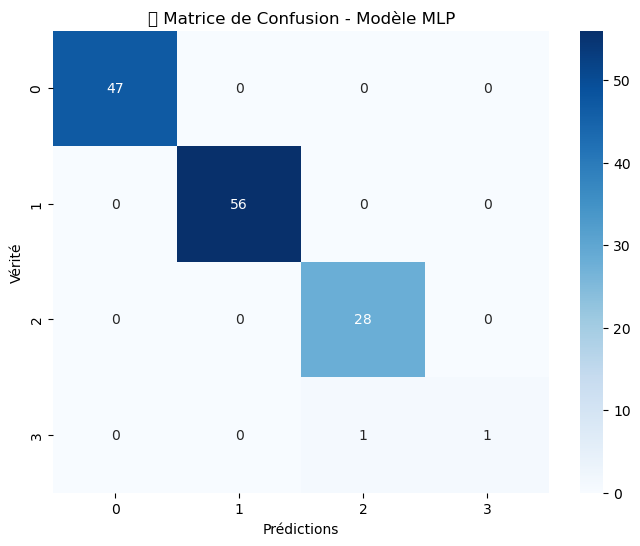

In [38]:


# Vérifier que y_pred et y_test sont bien en int
y_pred = y_pred.astype(int)
y_test = y_test.astype(int)

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage propre
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=sorted(set(y_test)), 
            yticklabels=sorted(set(y_test)))

plt.xlabel("Prédictions")
plt.ylabel("Vérité")
plt.title("🔍 Matrice de Confusion - Modèle MLP")
plt.show()


In [39]:
y_train.dtype

dtype('int32')

In [40]:
# Calculer les poids des classes automatiquement
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)

# Transformer en dictionnaire pour l'utiliser dans la loss du MLP
class_weight_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

print("🔍 Poids des classes :", class_weight_dict)

🔍 Poids des classes : {0: 0.6927083333333334, 1: 0.5450819672131147, 2: 1.4615384615384615, 3: 26.6}


In [41]:
# Calcul de la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f" Précision du modèle (Accuracy) : {accuracy:.2f}")

 Précision du modèle (Accuracy) : 0.99


Plan de test

Je choisis un logement existant dans le dataset.
Je modifie certaines valeurs pour simuler une rénovation énergétique.
Je prédit son DPE avant et après l’amélioration.
Je compare l'impact des modifications.

In [42]:
#  un logement aléatoire
logement = df_model_extended.sample(1, random_state=42)

# Affichage des caractéristiques initiales du logement
print(" Logement sélectionné avant rénovation :\n", logement)
print("\nDPE initial :", logement["Classe_DPE"].values[0])


 Logement sélectionné avant rénovation :
      Conso_5_usages_é_finale  Déperditions_renouvellement_air  \
307                   6900.2                            715.0   

     Année_construction  Deperditions_planchers_bas  \
307              1996.0                        99.1   

     Présence_production_PV_(0/1)  Type_installation_chauffage  \
307                           0.0                            1   

     Déperditions_murs  Conso_chauffage_é_finale  \
307              377.4                    4326.5   

     Production_électricité_PV_(kWhep/an)  Zone_climatique_  \
307                                   0.0                 0   

     Surface_habitable_logement  Qualité_isolation_enveloppe  \
307                        65.1                            1   

     Type_ventilation  Deperditions_planchers_hauts  Classe_inertie_bâtiment  \
307                 0                         786.6                        0   

     Classe_DPE  Type_énergie_principale_chauffage  \
307    

In [43]:
logement = logement.drop(["Classe_DPE"], axis=1)
logement

,Conso_5_usages_é_finale,Déperditions_renouvellement_air,Année_construction,Deperditions_planchers_bas,Présence_production_PV_(0/1),Type_installation_chauffage,Déperditions_murs,Conso_chauffage_é_finale,Production_électricité_PV_(kWhep/an),Zone_climatique_,Surface_habitable_logement,Qualité_isolation_enveloppe,Type_ventilation,Deperditions_planchers_hauts,Classe_inertie_bâtiment,Type_énergie_principale_chauffage,Type_énergie_principale_ECS
307,6900.2,715.0,1996.0,99.1,0.0,1,377.4,4326.5,0.0,0,65.1,1,0,786.6,0,1,1


In [44]:
# Simulation d'une rénovation énergétique
logement_ameliore = logement.copy()

# Exemples de modifications :
logement_ameliore["Type_énergie_principale_chauffage"] = 1  # Ex : Passer du chauffage électrique à une PAC
logement_ameliore["Classe_inertie_bâtiment"] = 2  # Ex : Isolation renforcée
logement_ameliore["Conso_chauffage_é_finale"] *= 0.7  # Ex : -30% de consommation chauffage après travaux
logement_ameliore["Conso_5_usages_é_finale"] *= 0.8  # Ex : -20% de consommation totale

# Affichage des caractéristiques après rénovation
print("\n Logement après rénovation :\n")


 Logement après rénovation :



Entraîner d'un modèle MLP pour prédire le DPE avant et après rénovation.

In [45]:
logement_ameliore.values

array([[5.52016e+03, 7.15000e+02, 1.99600e+03, 9.91000e+01, 0.00000e+00,
        1.00000e+00, 3.77400e+02, 3.02855e+03, 0.00000e+00, 0.00000e+00,
        6.51000e+01, 1.00000e+00, 0.00000e+00, 7.86600e+02, 2.00000e+00,
        1.00000e+00, 1.00000e+00]])

In [46]:
# Récupération des valeurs d'entrée (la forme attendue doit être (1, n_features))
input_values = logement_ameliore.values

# Normaliser les valeurs d'entrée avec le même scaler utilisé pour l'entraînement
logement_ameliore_scaled = scaler.transform(input_values)

# Prédire avec le modèle Keras
predicted_probabilities = model.predict(logement_ameliore_scaled)

# Si c'est une classification, obtenir la classe prédite (la plus haute probabilité)
predicted_class = np.argmax(predicted_probabilities, axis=1)

print("La classe prédite pour le logement amélioré est :", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
La classe prédite pour le logement amélioré est : [1]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [47]:
# Récupération des valeurs d'entrée (la forme attendue doit être (1, n_features))
input_values = logement.values

# Normaliser les valeurs d'entrée avec le même scaler utilisé pour l'entraînement
logement_ameliore_scaled = scaler.transform(input_values)

# Prédire avec le modèle Keras
predicted_probabilities = model.predict(logement_ameliore_scaled)

# Si c'est une classification, obtenir la classe prédite (la plus haute probabilité)
predicted_class = np.argmax(predicted_probabilities, axis=1)

print("La classe prédite pour le logement amélioré est :", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
La classe prédite pour le logement amélioré est : [1]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
